In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Undistort and Transform Perspective
===


[[  436.50704956   114.33557129]
 [ 1103.99841309   224.66326904]
 [  465.32727051   768.5894165 ]
 [ 1075.51147461   658.02740479]]


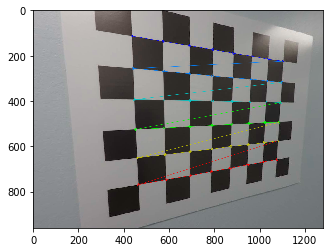

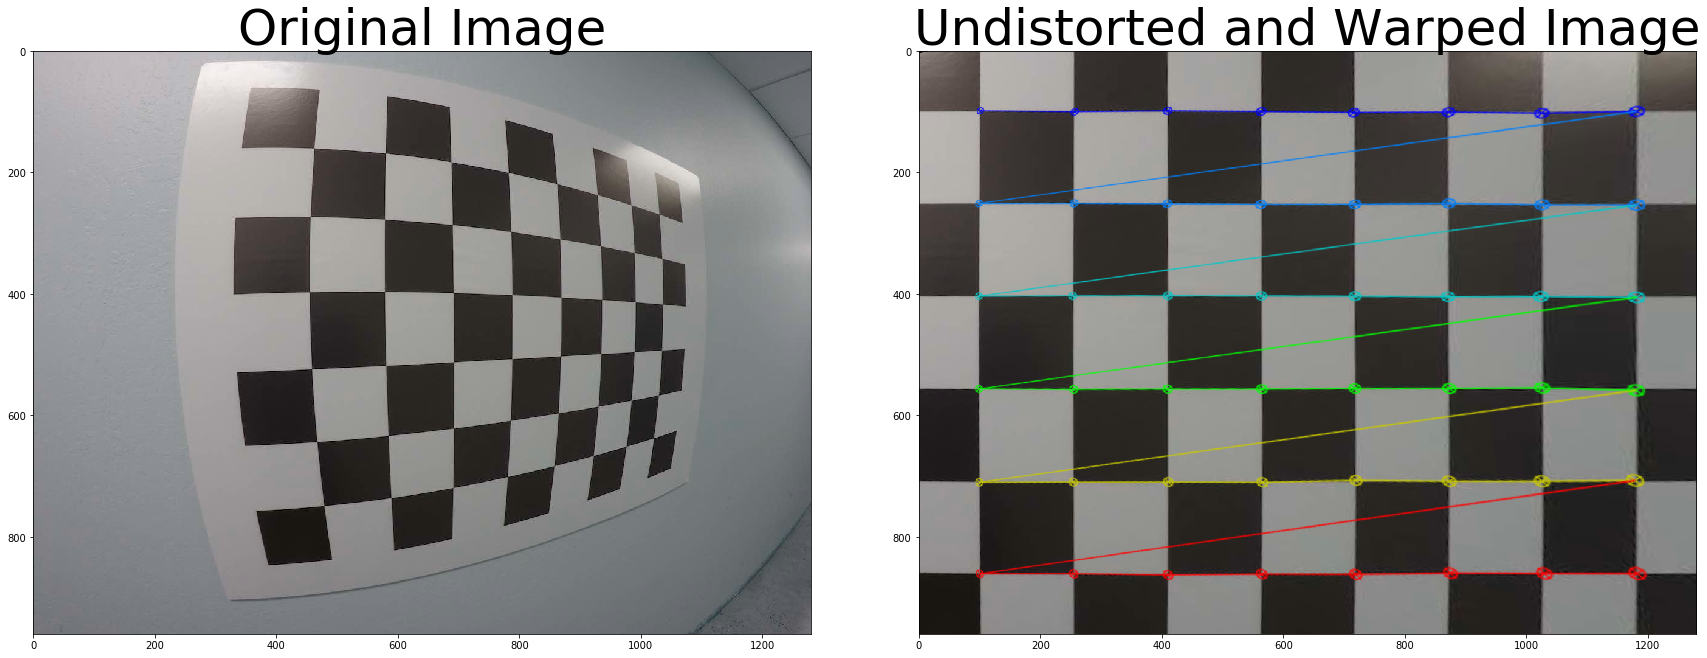

In [32]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
#print("mtx:  {}".format(mtx))
#print("dist: {}".format(dist))

# Read in an image
img = cv2.imread('test_image2.png')
img_size = (img.shape[1], img.shape[0])
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undistorted_img = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray_img, (nx,ny), None)
    # 4) If corners found:
    if ret == True:
        # a) draw corners
        #print(len(corners))
        #print(corners)
        cv2.drawChessboardCorners(undistorted_img, (nx,ny), corners, ret)
        plt.imshow(undistorted_img)
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
             #Note: you could pick any four of the detected corners 
             # as long as those four corners define a rectangle
             #One especially smart way to do this would be to use four well-chosen
             # corners that were automatically detected during the undistortion steps
             #We recommend using the automatic detection of corners in your code
        # For source points I am taking the outer four detected corners (starting from top-left corner)
        src = np.float32([corners[0][0], corners[nx-1][0], corners[-nx][0], corners[(nx*ny)-1][0]])
        print(src)
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        # For destination points I am taking the image size to map four detected corners (starting from top-left corner)
        # + add small offset to get some offset in the image
        offset = 100 # in pixels
        dst = np.float32([[0+offset,0+offset], [img_size[0]-offset,0+offset], \
                          [0+offset,img_size[1]-offset], [img_size[0]-offset,img_size[1]-offset]])
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(undistorted_img, M, img_size, flags=cv2.INTER_LINEAR)
    #delete the next two lines
    #M = None
    #warped = np.copy(img) 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
